# Importing Packages 

In [1]:
import time
import random
import matplotlib.pyplot as plt

# Setting Params

In [2]:
#Number of categories
granularity=100

#How the mutation rate changes over time
mutation_schedule= [0.3, 0.2, 0.1, 0.07, 0.05, 0.03, 0.02, 0.01]

#Minimum Hamming Distance of Changes- to prevent small oscillations 
min_hamming_change= 2

#How long we wait before reducing mutation rate
patience_epochs= 10

#Max number of epochs before we stop
max_total_epochs= 7_000

#Number of Monte Carlo simulations for each competition
num_sims= 10_000

#Number of strategies for each player
num_agg_strats= 10
num_def_strats= 10


# Defining Game and Hamming Distance

In [3]:
def zero_one_game(def_num, agg_num, def_action, agg_action, bet=1):
    if agg_action=='check':
        if def_num>=agg_num:
            return 0
        
        else:
            return 1
        
    else:
        if def_action=='fold':
            return 1
        
        else:
            if def_num>=agg_num:
                return -bet
            
            else:
                return 1+ bet
            
            
    

In [4]:
def hamming_distance(lis1, lis2):
    if len(lis1)!=len(lis2):
        return 'lengths do not match!'
        
    else:
        dis=0
        for i in range(len(lis1)):
            if lis1[i]!=lis2[i]:
                dis+=1
                
    return dis

In [5]:
hamming_distance([0,1,1], [1,0,1])

2

# Making 2 Random Strategies Compete

In [6]:
#Making the strategies a random combination of our two actions
aggressive_strat_0={}
for i in range(granularity):
    aggressive_strat_0[i]= random.choice(['bet', 'check'])
    
    
defensive_strat_0={}
for i in range(granularity):
    defensive_strat_0[i]= random.choice(['call', 'fold'])

In [7]:
#Seeing what happens when both strategies compete

agg_payoff=0
for i in range(10_000):
    defensive_strategy= defensive_strat_0
    aggressive_strategy= aggressive_strat_0
    
    def_hand=random.random()
    agg_hand= random.random()
    
    def_action= defensive_strategy[int(granularity*def_hand)]
    agg_action= aggressive_strategy[int(granularity*agg_hand)]
    
    agg_payoff+=zero_one_game(def_hand, agg_hand, def_action, agg_action)

In [8]:
#Payoff for aggressive player's strategy

agg_payoff

6750

# Making 10 Random Strategies Compete

In [9]:
#10 different random aggressive strats

aggressive_strats=[]
for i in range(10):
    strat={}
    for j in range(granularity):
        strat[j]= random.choice(['bet', 'check'])
        
    aggressive_strats.append(strat)

In [10]:
#10 different random defensive strats

defensive_strats=[]
for i in range(10):
    strat={}
    for j in range(granularity):
        strat[j]= random.choice(['call', 'fold'])
        
    defensive_strats.append(strat)
    
    

In [11]:
#Creating list to keep track of eacc strategy's payoff

agg_payoffs=[]
def_payoffs=[]
for i in range(len(aggressive_strats)):
    agg_payoffs.append(0)
    
for i in range(len(defensive_strats)):
    def_payoffs.append(0)

In [12]:
#Creating one random list, so that it is a level playing field

ran_list_agg=[]
ran_list_def=[]
for i in range(10_000):
    ran_list_agg.append(random.random())
    ran_list_def.append(random.random())

In [13]:
#Making strategies fight and logging payoffs

for i in range(len(aggressive_strats)):
    for j in range(len(defensive_strats)):
        
        defensive_strategy= defensive_strats[j]
            
        aggressive_strategy= aggressive_strats[i]
        
        payoff=0
        
        for sim in range(len(ran_list_agg)):
            


            def_hand=ran_list_def[sim]
            agg_hand= ran_list_agg[sim]

            def_action= defensive_strategy[int(granularity*def_hand)]
            agg_action= aggressive_strategy[int(granularity*agg_hand)]

            payoff+=zero_one_game(def_hand, agg_hand, def_action, agg_action)
            
        agg_payoffs[i]+=payoff
        def_payoffs[j]+=-payoff
        

In [14]:
agg_payoffs

[62926, 62655, 63192, 62232, 59663, 61589, 63520, 62520, 61500, 64464]

In [15]:
def_payoffs

[-62403,
 -60292,
 -62265,
 -62277,
 -61026,
 -64891,
 -62558,
 -62449,
 -61874,
 -64226]

In [16]:
#Best Aggressive Strategy, generally bets many of strongest hands

max_agg_index=0
max_agg_payoff= agg_payoffs[0]
for i in range(1, len(agg_payoffs)):
    if agg_payoffs[i]>max_agg_payoff:
        max_agg_payoff= agg_payoffs[i]
        max_agg_index=i
        
aggressive_strats[max_agg_index]

{0: 'check',
 1: 'check',
 2: 'check',
 3: 'bet',
 4: 'bet',
 5: 'bet',
 6: 'check',
 7: 'bet',
 8: 'bet',
 9: 'check',
 10: 'bet',
 11: 'check',
 12: 'bet',
 13: 'check',
 14: 'check',
 15: 'bet',
 16: 'bet',
 17: 'check',
 18: 'check',
 19: 'check',
 20: 'check',
 21: 'bet',
 22: 'bet',
 23: 'check',
 24: 'check',
 25: 'bet',
 26: 'bet',
 27: 'check',
 28: 'bet',
 29: 'check',
 30: 'check',
 31: 'bet',
 32: 'bet',
 33: 'check',
 34: 'bet',
 35: 'bet',
 36: 'bet',
 37: 'bet',
 38: 'bet',
 39: 'check',
 40: 'check',
 41: 'bet',
 42: 'bet',
 43: 'check',
 44: 'bet',
 45: 'bet',
 46: 'check',
 47: 'check',
 48: 'bet',
 49: 'bet',
 50: 'check',
 51: 'bet',
 52: 'bet',
 53: 'check',
 54: 'bet',
 55: 'check',
 56: 'check',
 57: 'bet',
 58: 'bet',
 59: 'bet',
 60: 'bet',
 61: 'bet',
 62: 'check',
 63: 'check',
 64: 'bet',
 65: 'bet',
 66: 'bet',
 67: 'check',
 68: 'bet',
 69: 'bet',
 70: 'bet',
 71: 'check',
 72: 'bet',
 73: 'check',
 74: 'bet',
 75: 'check',
 76: 'check',
 77: 'check',
 78:

In [17]:
#Best Defensive strategy, generally folds weaker hands, calls stronger hands

max_def_index=0
max_def_payoff= def_payoffs[0]
for i in range(1, len(def_payoffs)):
    if def_payoffs[i]>max_def_payoff:
        max_def_payoff= def_payoffs[i]
        max_def_index=i
        
defensive_strats[max_def_index]

{0: 'fold',
 1: 'fold',
 2: 'call',
 3: 'call',
 4: 'fold',
 5: 'call',
 6: 'call',
 7: 'call',
 8: 'fold',
 9: 'call',
 10: 'fold',
 11: 'fold',
 12: 'fold',
 13: 'call',
 14: 'fold',
 15: 'fold',
 16: 'fold',
 17: 'fold',
 18: 'call',
 19: 'fold',
 20: 'fold',
 21: 'call',
 22: 'fold',
 23: 'fold',
 24: 'fold',
 25: 'call',
 26: 'call',
 27: 'fold',
 28: 'call',
 29: 'fold',
 30: 'call',
 31: 'fold',
 32: 'fold',
 33: 'fold',
 34: 'fold',
 35: 'call',
 36: 'call',
 37: 'fold',
 38: 'call',
 39: 'fold',
 40: 'fold',
 41: 'call',
 42: 'fold',
 43: 'call',
 44: 'fold',
 45: 'fold',
 46: 'fold',
 47: 'call',
 48: 'call',
 49: 'fold',
 50: 'fold',
 51: 'fold',
 52: 'fold',
 53: 'fold',
 54: 'fold',
 55: 'call',
 56: 'call',
 57: 'call',
 58: 'fold',
 59: 'fold',
 60: 'call',
 61: 'call',
 62: 'call',
 63: 'call',
 64: 'call',
 65: 'fold',
 66: 'fold',
 67: 'call',
 68: 'call',
 69: 'fold',
 70: 'fold',
 71: 'fold',
 72: 'fold',
 73: 'call',
 74: 'call',
 75: 'call',
 76: 'fold',
 77: 'cal

# Genetic Algorithm

In [18]:
#Runs our genetic algorithm

#Where we are on the mutation schedule
schedule_num=0

#Number of conescutive epochs where not much has happened
patience=0

#Total number of epochs
epoch_count=0

#starts our timer
start=time.time()

#Initialising both parents as empty lists    
agg_parents=[]
    
def_parents= []

#After too many epochs or mutation schedule runs out, we stop
while epoch_count<max_total_epochs and schedule_num<len(mutation_schedule):
    

    #Set mutation rate
    mutation_rate= mutation_schedule[schedule_num]
    
    #Print commands for logging, don't want it to print for 0
    if epoch_count%50==0:
        
        if epoch_count!=0:
            print('epochs: ', epoch_count)
            print('MR: ', mutation_rate)
            print('agg payoff: ', top_two_agg_payoffs[0]/(2*num_sims))
            print('time(m): ', (time.time()-start)/60)
            print('')
            print('')
    
    #Aggressive strats intially populated with parents
    agg_strats= agg_parents.copy()
    
    #Defensive strats initially populated with parents
    def_strats= def_parents.copy()
    
    
    #If no parents add in random strats 
    if agg_parents==[]:
        
        for i in range(num_agg_strats):
            strat={}
            for j in range(granularity):
                strat[j]= random.choice(['bet', 'check'])

            agg_strats.append(strat)
        
    
        for i in range(num_def_strats):
            strat={}
            for j in range(granularity):
                strat[j]= random.choice(['call', 'fold'])

            def_strats.append(strat)
       
    #If parents create a 'child' with 'mutations'
    else:
        for i in range(num_agg_strats-2):
            strat={}
            
            for j in range(granularity):
                
                #If parents disagree, pick randomly
                if agg_parents[0][j]!=agg_parents[1][j]:
                    
                    strat[j]= random.choice(['bet' , 'check'])
                    
                else:
                    
                    randomiser= random.random()
                    
                    if randomiser<(1- 2*mutation_rate):
                        strat[j]=agg_parents[0][j]
                        
                    #If not, generally agree with parents
                    #with small chance of doing opposite    
                    
                    else:
                        strat[j]= random.choice(['bet', 'check'])
                        
            
            agg_strats.append(strat)
         
        #Same thing for defensive strats
        for i in range(num_def_strats-2):
            strat={}
            for j in range(granularity):
                
                if def_parents[0][j]!=def_parents[1][j]:
                    
                    strat[j]= random.choice(['call' , 'fold'])
                    
                else:
                    
                    randomiser= random.random()
                    
                    if randomiser<(1-2*mutation_rate):
                        strat[j]=def_parents[0][j]
                        
                    else:
                        strat[j]= random.choice(['call', 'fold'])
                        
            
            def_strats.append(strat)
            
    #Making list to hold payoffs        
    agg_payoffs=[]
    def_payoffs=[]
    
    
    for i in range(len(agg_strats)):
        agg_payoffs.append(0)
        
    for i in range(len(def_strats)):
        def_payoffs.append(0)
    
    #preparing random lists before for level playing field
    ran_list_agg=[]
    ran_list_def=[]
    for i in range(num_sims):
        ran_list_agg.append(int(100*i/ num_sims)/100 + random.random()/100)
        ran_list_def.append((i%100)/100 + random.random()/100)
        
    #Compare how aggressive strats do only vs top 2 defensive strats
    for i in range(len(agg_strats)):
                
        for j in range(2):

            def_strategy= def_strats[j]

            agg_strategy= agg_strats[i]

            payoff=0

            for sim in range(len(ran_list_agg)):

                def_hand=ran_list_def[sim]
                agg_hand= ran_list_agg[sim]

                def_action= def_strategy[int(granularity*def_hand)]
                agg_action= agg_strategy[int(granularity*agg_hand)]

                payoff+=zero_one_game(def_hand, agg_hand, def_action, agg_action)

            agg_payoffs[i]+=payoff
            
            if i<2:
                
                def_payoffs[j]-=payoff
                
                
    #See how defensive strats do vs top 2 aggressive strats            
            
    for j in range(2, len(def_strats)):
        
        for i in range(2):
            
            def_strategy= def_strats[j]

            agg_strategy= agg_strats[i]

            payoff=0

            for sim in range(len(ran_list_agg)):

                def_hand=ran_list_def[sim]
                agg_hand= ran_list_agg[sim]

                def_action= def_strategy[int(granularity*def_hand)]
                agg_action= agg_strategy[int(granularity*agg_hand)]

                payoff+=zero_one_game(def_hand, agg_hand, def_action, agg_action)

            def_payoffs[j]+=-payoff
        
    
    #Track indices and payoffs of top two strats
    
    top_two_agg_indices=[0, 1]
    
    top_two_agg_payoffs=[ agg_payoffs[0], agg_payoffs[1]]
    
    top_two_def_indices=[0, 1]
    
    top_two_def_payoffs= [ def_payoffs[0], def_payoffs[1]]
    
    #For seeing if hamming distance is high enough
    agg_hamming=0
    
    #Compare all strats to top 2 strats, see if they are better
    #See how different they are if they are better
    
    for i in range(2, len(agg_strats)):
        
        if agg_payoffs[i]>top_two_agg_payoffs[0]:
            
            lis1= list(agg_strats[i].values())
            lis2= list(agg_strats[top_two_agg_indices[0]].values())
            
            top_two_agg_payoffs[1]= top_two_agg_payoffs[0]
            top_two_agg_payoffs[0]= agg_payoffs[i]
            
            top_two_agg_indices[1]= top_two_agg_indices[0]
            top_two_agg_indices[0]= i
            
      
            h= hamming_distance(lis1, lis2)
            
            if h>agg_hamming:
                agg_hamming=h
            
        elif agg_payoffs[i]>top_two_agg_payoffs[1]:
            lis1= list(agg_strats[i].values())
            lis2= list(agg_strats[top_two_agg_indices[1]].values())
            
            top_two_agg_payoffs[1]= agg_payoffs[i]
            top_two_agg_indices[1]= i
            
            
            h= hamming_distance(lis1, lis2)
            
            if h>agg_hamming:
                agg_hamming=h
          
        
    #Do same for defensive strats
    
    def_hamming=0    
    
    for i in range(2, len(def_strats)):
        
        if def_payoffs[i]>top_two_def_payoffs[0]:
            
            lis1= list(def_strats[i].values())
            lis2= list(def_strats[top_two_def_indices[0]].values())
            
            top_two_def_payoffs[1]= top_two_def_payoffs[0]
            top_two_def_payoffs[0]= def_payoffs[i]
            
            top_two_def_indices[1]= top_two_def_indices[0]
            top_two_def_indices[0]=i
            
            
            
            h= hamming_distance(lis1, lis2)
            
            if h>def_hamming:
                def_hamming=h
            
        elif def_payoffs[i]>top_two_def_payoffs[1]:
            
            lis1= list(def_strats[i].values())
            lis2= list(def_strats[top_two_def_indices[1]].values())
            
            top_two_def_payoffs[1]= def_payoffs[i]
            top_two_def_indices[1]=i
            
            h= hamming_distance(lis1, lis2)
            
            if h>def_hamming:
                def_hamming=h
            
    #If both aggressive and defensinve strategies have not changed much
    #We can say 'not much happened', so we add 1 to our patience count
        
    if agg_hamming<min_hamming_change and def_hamming<min_hamming_change:
        patience+=1
       
    #If something happened we reset the counter to 0
    else:
        patience=0
      
    #If we have hit our patience limit, we reduce the mutation rate
    
    if patience>= patience_epochs:
        print('MR drop from: ', mutation_schedule[schedule_num])
        print('')
        schedule_num+=1
        
    #Set new parents for aggressive and defensive strategies 
    
    agg_ind1= top_two_agg_indices[0]
    agg_ind2= top_two_agg_indices[1]
    
    agg_parents= [agg_strats[agg_ind1], agg_strats[agg_ind2]]
    
    def_ind1= top_two_def_indices[0]
    def_ind2= top_two_def_indices[1]
    
    def_parents= [def_strats[def_ind1], def_strats[def_ind2]]
       
    #Counts one extra epoch     
    epoch_count+=1


MR drop from:  0.3

epochs:  50
MR:  0.2
agg payoff:  0.57705
time(m):  0.2871760328610738


epochs:  100
MR:  0.2
agg payoff:  0.5484
time(m):  0.5725336988766988


MR drop from:  0.2

epochs:  150
MR:  0.1
agg payoff:  0.5472
time(m):  0.8606732845306396


MR drop from:  0.1

epochs:  200
MR:  0.07
agg payoff:  0.54195
time(m):  1.1569523016611736


epochs:  250
MR:  0.07
agg payoff:  0.54955
time(m):  1.456118933359782


epochs:  300
MR:  0.07
agg payoff:  0.54025
time(m):  1.7614734172821045


epochs:  350
MR:  0.07
agg payoff:  0.55545
time(m):  2.059894887606303


epochs:  400
MR:  0.07
agg payoff:  0.53775
time(m):  2.351386352380117


epochs:  450
MR:  0.07
agg payoff:  0.54635
time(m):  2.6359167178471883


epochs:  500
MR:  0.07
agg payoff:  0.5506
time(m):  2.9247926513353986


epochs:  550
MR:  0.07
agg payoff:  0.55225
time(m):  3.209429450829824


epochs:  600
MR:  0.07
agg payoff:  0.5449
time(m):  3.4922868172327677


MR drop from:  0.07

MR drop from:  0.05

epochs:  6

# Results

In [19]:
agg_parents[0]

{0: 'bet',
 1: 'bet',
 2: 'bet',
 3: 'bet',
 4: 'bet',
 5: 'bet',
 6: 'bet',
 7: 'bet',
 8: 'bet',
 9: 'bet',
 10: 'bet',
 11: 'check',
 12: 'check',
 13: 'check',
 14: 'check',
 15: 'bet',
 16: 'check',
 17: 'check',
 18: 'check',
 19: 'check',
 20: 'check',
 21: 'check',
 22: 'check',
 23: 'check',
 24: 'check',
 25: 'check',
 26: 'check',
 27: 'check',
 28: 'check',
 29: 'check',
 30: 'check',
 31: 'check',
 32: 'check',
 33: 'check',
 34: 'check',
 35: 'check',
 36: 'check',
 37: 'check',
 38: 'check',
 39: 'check',
 40: 'check',
 41: 'check',
 42: 'check',
 43: 'check',
 44: 'check',
 45: 'check',
 46: 'check',
 47: 'check',
 48: 'check',
 49: 'check',
 50: 'check',
 51: 'check',
 52: 'check',
 53: 'check',
 54: 'check',
 55: 'check',
 56: 'check',
 57: 'check',
 58: 'check',
 59: 'check',
 60: 'check',
 61: 'check',
 62: 'check',
 63: 'check',
 64: 'check',
 65: 'check',
 66: 'check',
 67: 'check',
 68: 'check',
 69: 'check',
 70: 'bet',
 71: 'check',
 72: 'check',
 73: 'check',


In [20]:
def_parents[0]

{0: 'fold',
 1: 'fold',
 2: 'fold',
 3: 'fold',
 4: 'fold',
 5: 'fold',
 6: 'fold',
 7: 'fold',
 8: 'fold',
 9: 'fold',
 10: 'fold',
 11: 'fold',
 12: 'fold',
 13: 'fold',
 14: 'fold',
 15: 'fold',
 16: 'fold',
 17: 'call',
 18: 'fold',
 19: 'fold',
 20: 'call',
 21: 'fold',
 22: 'fold',
 23: 'fold',
 24: 'fold',
 25: 'fold',
 26: 'fold',
 27: 'fold',
 28: 'fold',
 29: 'fold',
 30: 'fold',
 31: 'fold',
 32: 'fold',
 33: 'fold',
 34: 'fold',
 35: 'fold',
 36: 'fold',
 37: 'fold',
 38: 'fold',
 39: 'fold',
 40: 'call',
 41: 'fold',
 42: 'call',
 43: 'fold',
 44: 'call',
 45: 'fold',
 46: 'fold',
 47: 'fold',
 48: 'fold',
 49: 'fold',
 50: 'fold',
 51: 'fold',
 52: 'fold',
 53: 'call',
 54: 'fold',
 55: 'call',
 56: 'fold',
 57: 'call',
 58: 'fold',
 59: 'call',
 60: 'call',
 61: 'fold',
 62: 'fold',
 63: 'fold',
 64: 'fold',
 65: 'fold',
 66: 'call',
 67: 'fold',
 68: 'fold',
 69: 'call',
 70: 'call',
 71: 'call',
 72: 'call',
 73: 'call',
 74: 'call',
 75: 'call',
 76: 'call',
 77: 'cal

In [27]:
num_agg_parents=[]
for i in range(granularity):
    num_agg_parents.append(0)
    
    for p in agg_parents:
        val = list(p.values())[i]
        if val=='bet':
            num_agg_parents[i]+=1

    
    

    

In [28]:
num_def_parents=[]
for i in range(granularity):
    num_def_parents.append(0)
    
    for p in def_parents:
        val= list(p.values())[i]
        if val=='call':
            num_def_parents[i]+=1

In [32]:
gran_list=[]
for i in range(granularity):
    gran_list.append(i/granularity)

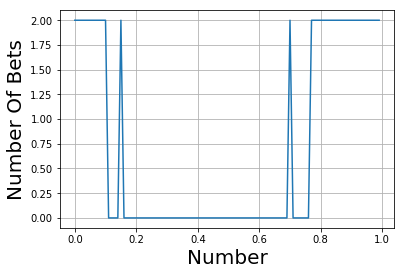

In [37]:
plt.plot(gran_list, num_agg_parents)
plt.ylabel('Number Of Bets', size=20)
plt.xlabel('Number', size=20)
plt.grid()

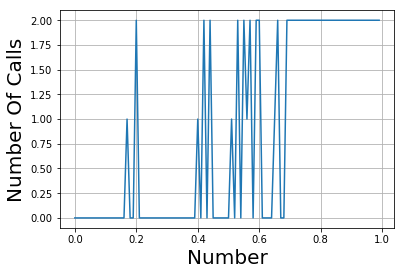

In [38]:
plt.plot(gran_list, num_def_parents)
plt.ylabel('Number Of Calls', size=20)
plt.xlabel('Number', size=20)
plt.grid()

In [42]:
agg_payoffs[0]/(num_sims*2)

0.552